In [1]:
import numpy as np
import pandas as pd

from scipy import stats as sts

import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

## Задание 1 (рейтинги президентов) 

В таблице `presidents.csv` представлены рейтинги различных президентов США (интересно, почему не российских). Социальные опросы проводились раз в квартал. Опрашивалась случайная выборка граждан. У каждого спрашивалось одобряет ли он деятельность президента.

Ричард Никсон был президентом США с 20 января 1969 года по 9 августа 1974 года. 17 июня 1972 года произошёл Уотергейтский скандал. Давайте проанализируем, что при этом произошло с его рейтингом.

In [2]:
df = pd.read_csv('data/presidents.csv')
df.head()

,year,Qtr1,Qtr2,Qtr3,Qtr4
0,1945,NaN,87,82.0,75.0
1,1946,63.0,50,43.0,32.0
2,1947,35.0,60,54.0,55.0
3,1948,36.0,39,NaN,NaN
4,1949,69.0,57,57.0,51.0


Чтобы привести таблицу к удобному виду используйте функцию `pd.melt`. Вытащите из таблички рейтинг Никсона с 1 квартала 1969 года по 2 квартал 1972 года (включая его). Запишите эти данные в переменную `x`. Рейтинг с 3 квартала 1972 года по 2 квартал 1974 года поместите в переменную `y`. Пропуски в данных удалите из выборки.

In [3]:
df1 = pd.melt(df, 
              id_vars=['year'], 
              value_vars=['Qtr1', 'Qtr2', 'Qtr3', 'Qtr4'],
              value_name='rating',
              var_name='quarter').sort_values(['year', 'quarter']).reset_index(drop=True)

x = df1.loc[(df1['year'] >= 1969) & 
                     (df1['year'] <= 1972) & 
                     (df1['rating'].notna()), 'rating'].values

# 1972-Qtr3 и 1972-Qtr4 - пропуски в данных, поэтому просто беру с 1973
y = df1.loc[(df1['year'] > 1972) &
                     (df1['year'] <= 1974), 'rating'].iloc[:-2].values


Правда ли, что после скандала средний рейтинг Никсона рухнул? Предполагайте, что рейтинг распределён нормально, а также, что дисперсия рейтинга не изменилась из-за скандала. Наблюдаемое значение статистики запишите в переменную `obs`, в переменную `pval` запишите $p$-значение.

In [4]:
obs = sts.ttest_ind(x, y, alternative='greater')[0]
pval = sts.ttest_ind(x, y, alternative='greater')[1]
print(f"p-value: {pval:.4f}")

p-value: 0.0011


**Почему вы выбрали именно этот критерий для проверки гипотезы? Какие выводы вы сделали?**

**Ответ:** 

* Выборки независимы (опрашиваем каждый раз случайных граждан)
* Дисперсии равны, но неизвестны
* Нормальность распределения X и Y: $N(μ_x, σ^2), N(μ_y, σ^2)$

Поэтому я выбрал тест Стюдента о разности средних.

Гипотезы следующие: 

$H_0: μ_x - μ_y = 0$

$H_a: μ_x - μ_y > 0$

Правосторонняя критическая область, значение p-value = 0.0011. На 5% уровне значимости можно отвергнуть нулевую гипотезу и сделать вывод, что ДА - средний рейтинг Никсона упал после скандала.

## Задание 2 (доктор сон)

Проводится эксперимент о пользе нового снотворного. Для его проведения используется группа из $10$ студентов. В первый день каждый из них ложится спать. На утро измеряется, сколько он проспал. Из результата вычитают $8$ (нормальное число часов сна). На второй день каждому дают таблетку. Утром снова измеряют, сколько человек проспал, и вычитают $8$. Результаты эксперимента записаны в табличку `sleep.csv`.

In [6]:
df = pd.read_csv('data/sleep.csv')
df.head()

,extra,group,ID
0,0.7,1,1
1,-1.6,1,2
2,-0.2,1,3
3,-1.2,1,4
4,-0.1,1,5


Правда ли, что сон студентов до приёма снотворного не отличается от нормы (отклонение от 8 часов равно нулю). Проверьте эту гипотезу на $5\%$ уровне значимости, в переменную `pval1` запишите p-значение. 

In [7]:
x_before = df.loc[df['group'] == 1, 'extra'].values

tobs1 = sts.ttest_1samp(x_before, 0)[0]
pval1 = sts.ttest_1samp(x_before, 0)[1]

print(f"p-value: {pval1:.4f}")

p-value: 0.2176


**Ответ:**

$H_0: μ_{before} = 0$

$H_a: μ_{before} \neq 0$

, где $μ_{before}$ - отклонение от нормы до приема снотворного. p-value > 0.05 => нулевую гипотезу не отвергаем, т.е. сон студентов до приема лекарства не отличался от нормы


Правда ли, что благодаря таблеткам студенты стали спать больше (односторонняя альтернатива)? Запишите в переменную `pval2` соотвествующее p-значение. 

In [8]:
x_after = df.loc[df['group'] == 2, 'extra'].values
d = x_after - x_before

tobs2 = sts.ttest_1samp(d, 0, alternative='greater')[0]
pval2 = sts.ttest_1samp(d, 0, alternative='greater')[1]

print(f"p-value: {pval2:.4f}")

p-value: 0.0014


**Почему вы выбрали именно этот критерий для проверки гипотезы? Какие выводы вы сделали?**

**Ответ:** 

Использовал критерий Стьюдента для разницы мат. ожиданий в двух связанных выборках. Кажется, что реакция испытуемых до и после - являются связанными наблюдениями + испытуемые не менялись, поэтому выборки зависимы. Также дисперсия ген. совокупности (т.е. дисперсия всех реакций на препарат) неизестна, поэтому используем критерий Стьюдента.

$d = x_{after} - x_{before}$ 

$H_0: d = 0$

$H_a: d \neq 0$

Полученное p-value < 0.05 => нужно отвергнуть нулевую гипотезу и сделать вывод, что благодаря таблеткам действительно наблюдается увеличение длительности сна у студентов

## Задание 3 (мыши и зеркало)

$16$ лабораторных мышей были помещены в двухкомнатные клетки, в одной из комнат висело зеркало. С целью установить, есть ли у мышей какие-то предпочтения насчет зеркал, измерялась доля времени, которое каждая мышь проводила в каждой из своих двух клеток.

![](https://ars.els-cdn.com/content/image/1-s2.0-S0168159104000061-gr1.gif)

В файле `mouses_mirror.txt` лежит информация о том, какую долю времени мышка проводила в клетке с зеркалом. 

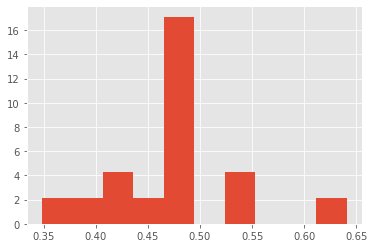

In [19]:
x = pd.read_csv('data/mouses_mirror.txt', header = None)[0].values
plt.hist(x, density=True);

Проверьте гипотезу о том, что мышкам безразлично в какой комнате проводить время с помощью критерия знаков. Сформулируйте нулевую гипотезу, перечислите основные особенности этого критерия. Запишите в переменную `pvalue_1` получившееся в результате этого $p$-значение. 

Гипотеза:

$H_0: Med(x) = 0.5$

$H_a: Med(x) \neq 0.5$

Т.к. у нас доли времени, то нужно проверить гипотезу, что мышь проводила ровно половину времени в комнате с зеркалом. Особенность непараметрических критериев в том, что мы отказываемся от предположений о виде распределения времени в комнатах мышей, что позволяет лояльнее относится к выбросам, т.к. на вид распределения они повлиять не могут. Особенность критерия знаков в том, что мы превращаем выборку в 0 и 1, из-за чего выборка становится распределена биномиально и благодаря биномиальному распределению мы можем проверять гипотезы о параметрах. Проблема критерия в том, что теряется часть информации из наблюдений, потому что разметка налюдений на 0 и 1 не отражает насколько сильно отклонились от параметра наблюдаемые значения, а значит этот тест подойдет не в любой ситуации, но в ситуации когда точность измерений низкая тест подходит

In [20]:
from statsmodels.stats.descriptivestats import sign_test
pvalue_1 = sign_test(x, mu0=0.5)[1]
pvalue_1

0.021270751953125

p-value оказался меньше 0.05 => можно отвергнуть нулевую гипотезу => по данном критерию мышам есть дело, в какой комнате проводить время

Проверьте гипотезу о том, что мышкам безразлично в какой комнате проводить время с помощью теста Вилкоксона. Сформулируйте нулевую гипотезу, перечислите основные особенности этого критерия.  Запишите в переменную `pvalue_2` получившееся в результате этого $p$-значение. 

Гипотеза:

$H_0: Med(x) = 0.5$

$H_a: Med(x) \neq 0.5$

Это также непараметрический криетрий, который отказывается от предпосылок о виде распределения. Особенность его в том, что он работает для связанных выборок и является ранговым, т.е. упорядочивает выборку и присваивает каждому наблюдению ранг (порядковый номер). Эти сдвиги суммируются и домножаются на знак (т.е. на направление изменений по сравнению со сравниваемым $\mu_{0}$) - так получается W-критерий Уилкоксона. Таким образом, сопоставляются абсолютные величины выраженности сдвигов в том или ином направлении. Если сдвиги имеют случайный характер, то суммы рангов окажутся примерно равны, а W будет близко к 0. Если же сдвиги имеют большую направленность в одну из сторон, то тогда сможем увидеть перекос в одну из сторон по направлению изменений.

Еще из особенностей: данный критерий лучше всего применять к небольшим выборкам, т.к. асимптотически W-критерий будет сходится к нормальному распределению, а значит там уже будут более применимы z-тесты

In [21]:
pvalue_2 = sts.wilcoxon(x - 0.5)[1] 
pvalue_2

0.09344482421875

p-value > 0.05 => не отвергаем нудевую гипотезу => мышам скорее всего нет дела, есть ли в их комнате зеркало или нет

Проверьте гипотезу о том, что мышкам безразлично в какой комнате проводить время с помощью асимптотического $z$-теста. Сформулируйте нулевую гипотезу, перечислите основные особенности этого критерия.  Запишите в переменную `pvalue_3` получившееся в результате этого $p$-значение. 

Гипотеза:

$H_0: \mu_{x} = 0.5$

$H_a: \mu_{x} \neq 0.5$

Данный критерий является параметрическим и для его применения необходимо, чтобы исходные данные имели нормальное распределение, а также была известна дисперсия генеральной совокупности. Критерий уже лучше работает со средним, а не медианой, но и становится более чувствителен к выбросам

In [22]:
from statsmodels.stats.weightstats import ztest, zconfint

pvalue_3 = ztest(x, value=0.5)[1]

print(pvalue_3)
zconfint(x, value=0.5)

0.13460721078205806


(-0.05708216782644818, 0.00765995532644817)

Объясните, почему `pvalue` от теста к тесту ведёт себя именно так. Подробнее про опыт с мышками читайте [в оригинальном исследовании.](https://www.sciencedirect.com/science/article/abs/pii/S0168159104000061)

__Ответ:__ Разные предпосылки, разные ограничения/особенности критериев, разные результаты. Если нам не важна информация о том, сколько конкретно мышь провела в другой комнате, а важно проверить, что именно неравное количество времени в разных комнатах, тогда можно воспользоваться критерием знаков и понять, что да, действительно разное. Но насколько это разница велика, данный критерий не оценит, т.к. этой информацией он принебрегает. Тест Уилкоксона уже лучше оценит разницу, т.к. ставит не просто знак наблюдению, а оценивает его, т.е. насколько он больше/меньше других наблюдений, давая ему ранг. Поэтому по нему мы делаем вывод, что разницы между временами нет на 5%-м уровне значимости. Z-тест использует предпосылки нормального распределения и лучше всего работает с большим количеством данных. На него я бы наверное особо не ориентировался в принципе в данном эксперименте. 

Поэтому если нас интересует есть ли хоть какая-то разница во времени в комнатах - тест знаков ответит да.

Если нас интересует насколько это разница большая - пользуемся тестом Уилкоксона и понимаем, что это разница недалеко ушла от разделения 50/50 между комнатами

А для z-теста набираем больше мышей